# **1. Business Understanding**

- The `Hotel Bookings Dataset` contains a comprehensive collection of information pertaining to hotel bookings, cancellations, and guests' details for Resort and City Hotels. From the dataset's description, "it provides insights into various aspects such as the type of hotel, the number of adults, children, and babies per booking, the length of stay, the meal plan chosen by guests," and other features. The travel industry is booming following the COVID restrictions that were in place over the past few years. However, cancellations are inevitable and can negatively impact hotel operations. The provided data in this dataset can facilitate analysis by examining the factors that are likely to lead to a cancellation, such as long lead times, the average daily rate, or even past cancellation behaviors. This dataset aims to identify these trends to predict whether a cancellation will occur or not.

- The dataset contains 119,390 rows and 33 features. The target feature is `is_canceled`, which indicates whether a reservation was canceled or not. Although the methods for acquiring this dataset are not explicitly stated, it is reasonable to infer that it was collected by hotel management systems or third-party booking platforms. The purpose for its collection was likely to assess the factors and trends leading to cancellations in reservations. Cancellations can financially impact hotel operations, especially if they occur last minute, after hotels have already allocated their budgets.

- The prediction task for this dataset is to predict whether a cancellation will happen or not based on trends or patterns identified in the data. For example, if city hotels experience more cancellations than resort hotels, it could indicate what guests value more in their hotel experiences. Accurate predictions would be beneficial to various stakeholders:
    - **Hotel Managers**: They could use the model to minimize revenue loss and optimize operations by adjusting pricing or offering last-minute deals for canceled rooms.
    - **Marketing Teams**: Insights from cancellation trends could help marketing departments design campaigns that attract guests less likely to cancel, or improve service offerings to reduce cancellation rates.
    - **Local Businesses**: Hotels often operate near popular destinations (e.g., Disneyland or downtown areas), so reducing cancellations ensures more tourists stay, benefiting nearby businesses.

## Measure of Success

To determine whether the prediction algorithm is successful, several criteria should be considered:

- **Accuracy**: The model should perform significantly better than random chance (50%). A success rate of over 90% would indicate that the model is effective in predicting cancellations, ensuring more reliable business decisions. An accuracy of 90% or higher would help hotels confidently adjust their overbooking strategies, dynamically price rooms, and increase operational efficiency.
  
- **Precision and Recall**: 
   - **Precision**: It is crucial to avoid incorrect predictions of cancellations (false positives) as these could lead to overbooking and customer dissatisfaction. 
   - **Recall**: Ensuring that most cancellations are correctly predicted (high recall) minimizes unexpected losses due to no-shows. 
   - A **balanced F1 score** (harmonic mean of precision and recall) would indicate an optimal trade-off between avoiding false positives and false negatives, making the model more practical for real-world use.

- **Practical Impact**: The model needs to be robust and flexible to handle real-world variability. For example, it should accommodate fluctuating booking patterns during peak seasons and varying customer behavior. Additionally, a successful model should help hotels maintain occupancy rates close to industry benchmarks (typically around 70%-80%) by dynamically adjusting prices for canceled rooms or offering last-minute deals to minimize revenue loss.

## Real-World Examples and Benchmarks

- **Overbooking Strategies**: Many hotels rely on predictive models to allow for overbooking, ensuring occupancy rates near 100%. Accurately predicting cancellations enables hotels to avoid losing revenue from empty rooms while preventing too many customers from arriving with insufficient room availability.
  
- **Revenue Management**: Accurate cancellation predictions can lead to a 10-15% improvement in overall hotel revenue by optimizing pricing strategies and maximizing room availability.

- **Operational Efficiency**: By predicting cancellations and adjusting for them in advance, hotels can better allocate their resources, adjust staffing levels, and reduce operational costs. For instance, if a high probability of cancellations is predicted for a particular weekend, hotel management can optimize staff scheduling and avoid overstaffing.



Resource: https://www.kaggle.com/datasets/thedevastator/hotel-bookings-analysis/data
- https://data.world/mesum/hotel-bookings-dataset/workspace/file?filename=hotel_bookings.csv

# **2. Data Understanding**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates

### **2.1 Loading the Dataset & Defining Data Types**

In [2]:
# Loading the dataset
path = '../Data/hotel_bookings.csv'

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Attributes Kept
We narrowed down the dataset from 32 attributes to 11 key features that closely align with our objective and prediction task. 

- **Aggregated Features:**
    - `num_of_guests`: This combines `adults`, `children`, and `babies` because the total number of guests is more likely to influence cancellations than each guest type separately.
    - `length_of_stay`: This merges `stays_in_weekend_nights` and `stays_in_week_nights` to reflect the total duration of the stay, which is more significant than the specific days of the week.
  
- **Individual Attributes:**
    - `hotel`: This captures whether the booking is for a resort or city hotel, which is important for understanding cancellation trends across different types of hotels (i.e. vacations vs. business trips).
    - `is_repeated_guest`, `previous_cancellations`, `booking_changes`: These provide insights into guest behavior, including past cancellations and modifications, which could predict future cancellations.
    - `adr`: The average daily rate paid by guests, which helps reveal if cancellations are more likely at certain price points.
    - `deposit_type`: Reflects whether a deposit was made, which is important in determining the likelihood of follow-through on the reservation.
    - `lead_time`: The amount of time between booking and arrival, a key factor in understanding guest decision patterns.
    - `reservation_status_date`: We wanted to investigate if particular months in the year yield higher cancellation rates.
        - This will be converted to `month_year` in order to extract monthly data per year. 

These attributes were selected based on their relevance to predicting cancellations and their potential to provide meaningful insights into guest behaviors and booking patterns.


#### Attributes Collected in Data

##### Categorical:
- **`hotel`**: Indicates the type of hotel (resort or city).
    - bool
    - 0=Resort Hotel, 1=City Hotel
- **`is_canceled`**: Specifies whether the booking was canceled or not.
    - 0=not canceled, 1=canceled
    - **target**: int
- **`is_repeated_guest`**: Indicates whether a guest is a repeated visitor.
    - 0=not repeated, 1=repeated
    - bool
- **`deposit_type`**: Indicates the type of deposit made for the booking.
    - One-hot encoded
    - 3 values: 'No Deposit', 'Refundable', 'Non Refund'
- **`month_year`**: Date at which last status was set
    - period[M] to denote monthly frequency for our analysis

##### Numerical:
- **`lead_time`**: Represents the number of days between the booking date and the arrival date.
    - int
- **`length_of_stay`**: Number of nights spent in total.
    - int
- **`num_of_guests`**: Total number of guests under reservation.
    - int
- **`previous_cancellations`**: Number of times the guest previously canceled their bookings.
    - int
- **`booking_changes`**: Number of changes made to the booking.
    - int
- **`adr`**: Represents the average daily rate (price per room) for the booking.
    - float


In [6]:
# Attributes Dropped
df.drop(['arrival_date_year', 'arrival_date_month', 
         'arrival_date_week_number', 
         'arrival_date_day_of_month', 
         'agent', 
         'company', 
         'required_car_parking_spaces',
         'meal',
         'country',
         'market_segment',
         'distribution_channel',
         'previous_bookings_not_canceled',
         'reserved_room_type',
         'assigned_room_type',
         'days_in_waiting_list',
         'customer_type',
         'required_car_parking_spaces',
         'reservation_status',
         'total_of_special_requests'
         ],
        axis=1,
        inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   lead_time                119390 non-null  int64  
 3   stays_in_weekend_nights  119390 non-null  int64  
 4   stays_in_week_nights     119390 non-null  int64  
 5   adults                   119390 non-null  int64  
 6   children                 119386 non-null  float64
 7   babies                   119390 non-null  int64  
 8   is_repeated_guest        119390 non-null  int64  
 9   previous_cancellations   119390 non-null  int64  
 10  booking_changes          119390 non-null  int64  
 11  deposit_type             119390 non-null  object 
 12  adr                      119390 non-null  float64
 13  reservation_status_date  119390 non-null  object 
dtypes: f

### **2.2 Verifying Data Quality**

#### Checking For Missing Values

In [8]:
df.isnull().sum()

hotel                      0
is_canceled                0
lead_time                  0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   4
babies                     0
is_repeated_guest          0
previous_cancellations     0
booking_changes            0
deposit_type               0
adr                        0
reservation_status_date    0
dtype: int64

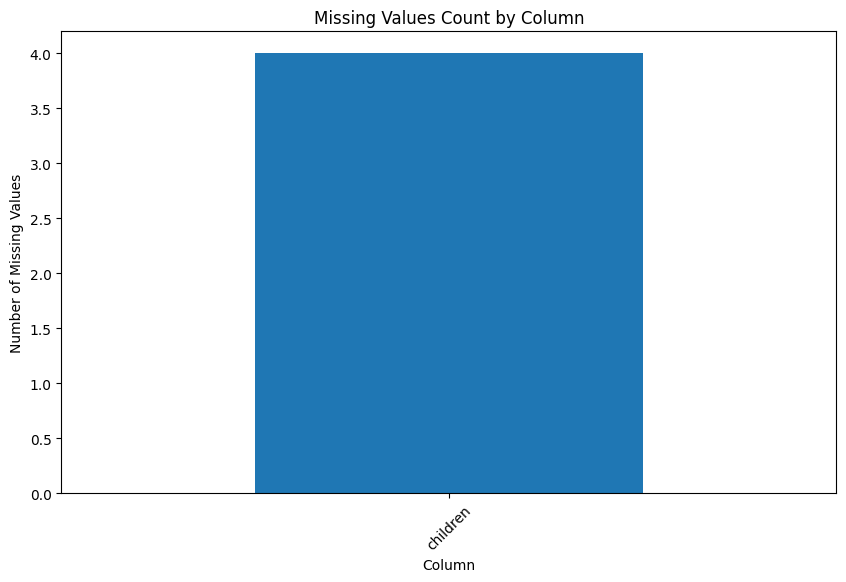

In [9]:
# Counting the missing values per col/attribute
missing_counts = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title('Missing Values Count by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

#### Checking for Duplicates

In [10]:
df.duplicated().sum()

np.int64(36539)

In [11]:
# Example: Last two entries here are duplicates!
df.head(6)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,adr,reservation_status_date
0,Resort Hotel,0,342,0,0,2,0.0,0,0,0,3,No Deposit,0.0,01-07-15
1,Resort Hotel,0,737,0,0,2,0.0,0,0,0,4,No Deposit,0.0,01-07-15
2,Resort Hotel,0,7,0,1,1,0.0,0,0,0,0,No Deposit,75.0,02-07-15
3,Resort Hotel,0,13,0,1,1,0.0,0,0,0,0,No Deposit,75.0,02-07-15
4,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,No Deposit,98.0,03-07-15
5,Resort Hotel,0,14,0,2,2,0.0,0,0,0,0,No Deposit,98.0,03-07-15


### Handling Missing and Duplicated Data

Before proceeding with feature aggregation, it’s crucial to ensure data quality by addressing missing and duplicated values.

#### Missing Data:
- **Identified Issue**: The `children` attribute had 4 missing values out of 119,390 entries. These missing values were likely caused by users leaving the "number of children" field blank during the booking process.
- **Analysis and Visualization**: To verify this, we visualized missing data using a bar plot, which showed that only the `children` column had missing entries, and the extent of missingness was minimal.
- **Justification for Imputation**: Given that there were only 4 missing values and that these likely represent bookings without children, we imputed the missing values with `0`. Since the impact is minor and the missing data represents less than 0.01% of the total entries, this method prevents skewing the dataset without requiring more advanced imputation techniques like KNN, which would be unnecessary for such a small fraction.

#### Duplicated Data:
- **Identified Issue**: We detected 41,787 duplicate entries out of 119,390 total entries (about 35% of the data). 
- **Potential Causes**: Duplicates may have resulted from merging different systems or accidental/intentional multiple bookings by the same guests.
- **Visualization**: We confirmed the presence of duplicates by simply looking at the first 6 entries in the dataset and spotting a duplicate in the 5th and 6th entries.
- **Justification for Elimination**: After examining the dataset, we decided to drop all duplicates. The reason for this is to prevent over-representation of certain guests or bookings, which could introduce bias in our model. By removing these 41,787 duplicate entries, we ensure that each entry represents a unique booking instance. After cleaning, we have over 70,000 unique entries, which remains a robust dataset for analysis.

### Converting to Appropriate Data Types
- Now that we've discovered missing and duplicated data, we can proceed to impute and eliminate, respectively.
- But first, we'll make sure to convert to appropriate data types if needed!
    - We also need to aggregate a few attributes

In [12]:
# Converting to Appropriate Data Types
df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1}).astype('bool')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('bool')
df = pd.get_dummies(df, columns=['deposit_type'], prefix=['deposit_type'])
df['children'] = df['children'].fillna(0).astype('int') # imputing children attribute with 0

# Converting reservation_status_date to month_year
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%y', errors='coerce')

df['month_year'] = df['reservation_status_date'].dt.to_period('M')
start_period = pd.Period('2015-07', freq='M')
df = df[df['month_year'] >= start_period]

In [13]:
# Aggregation of 'adults', 'children', and 'babies' into 'num_of_guests'
df['num_of_guests'] = df['adults'] + df['children'] + df['babies']

# Aggregation of 'stays_in_weekend_nights' and 'stays_in_week_nights' into 'length_of_stay'
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Dropping the attributes we aggregated
df = df.drop(columns=['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117040 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype    
---  ------                   --------------   -----    
 0   hotel                    117040 non-null  bool     
 1   is_canceled              117040 non-null  int64    
 2   lead_time                117040 non-null  int64    
 3   is_repeated_guest        117040 non-null  bool     
 4   previous_cancellations   117040 non-null  int64    
 5   booking_changes          117040 non-null  int64    
 6   adr                      117040 non-null  float64  
 7   deposit_type_No Deposit  117040 non-null  bool     
 8   deposit_type_Non Refund  117040 non-null  bool     
 9   deposit_type_Refundable  117040 non-null  bool     
 10  month_year               117040 non-null  period[M]
 11  num_of_guests            117040 non-null  int64    
 12  length_of_stay           117040 non-null  int64    
dtypes: bool(5), float64(1), int64(6), 

In [15]:
df.isnull().sum()

hotel                      0
is_canceled                0
lead_time                  0
is_repeated_guest          0
previous_cancellations     0
booking_changes            0
adr                        0
deposit_type_No Deposit    0
deposit_type_Non Refund    0
deposit_type_Refundable    0
month_year                 0
num_of_guests              0
length_of_stay             0
dtype: int64

- No more null values!

In [16]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

- No more duplicates!

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79595 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   hotel                    79595 non-null  bool     
 1   is_canceled              79595 non-null  int64    
 2   lead_time                79595 non-null  int64    
 3   is_repeated_guest        79595 non-null  bool     
 4   previous_cancellations   79595 non-null  int64    
 5   booking_changes          79595 non-null  int64    
 6   adr                      79595 non-null  float64  
 7   deposit_type_No Deposit  79595 non-null  bool     
 8   deposit_type_Non Refund  79595 non-null  bool     
 9   deposit_type_Refundable  79595 non-null  bool     
 10  month_year               79595 non-null  period[M]
 11  num_of_guests            79595 non-null  int64    
 12  length_of_stay           79595 non-null  int64    
dtypes: bool(5), float64(1), int64(6), period[M](1)
mem

In [19]:
# Reset the index just so it's easier to read the rows/entries
df = df.reset_index(drop=True)
df.tail()

,hotel,is_canceled,lead_time,is_repeated_guest,previous_cancellations,booking_changes,adr,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,month_year,num_of_guests,length_of_stay
79590,True,0,23,False,0,0,96.14,True,False,False,2017-09,2,7
79591,True,0,102,False,0,0,225.43,True,False,False,2017-09,3,7
79592,True,0,34,False,0,0,157.71,True,False,False,2017-09,2,7
79593,True,0,109,False,0,0,104.40,True,False,False,2017-09,2,7
79594,True,0,205,False,0,0,151.20,True,False,False,2017-09,2,9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79595 entries, 0 to 79594
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   hotel                    79595 non-null  bool     
 1   is_canceled              79595 non-null  int64    
 2   lead_time                79595 non-null  int64    
 3   is_repeated_guest        79595 non-null  bool     
 4   previous_cancellations   79595 non-null  int64    
 5   booking_changes          79595 non-null  int64    
 6   adr                      79595 non-null  float64  
 7   deposit_type_No Deposit  79595 non-null  bool     
 8   deposit_type_Non Refund  79595 non-null  bool     
 9   deposit_type_Refundable  79595 non-null  bool     
 10  month_year               79595 non-null  period[M]
 11  num_of_guests            79595 non-null  int64    
 12  length_of_stay           79595 non-null  int64    
dtypes: bool(5), float64(1), int64(6), period[M](1)

### One Last Thing: Checking For Outliers

In [21]:
df.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,num_of_guests,length_of_stay
count,79595.000000,79595.000000,79595.000000,79595.000000,79595.000000,79595.000000,79595.00000
mean,0.285998,80.013820,0.026798,0.280872,108.351345,2.050204,3.72492
std,0.451891,84.594216,0.301762,0.746215,55.764306,0.715324,2.79611
min,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,12.000000,0.000000,0.000000,74.000000,2.000000,2.00000
50%,0.000000,50.000000,0.000000,0.000000,99.800000,2.000000,3.00000
75%,1.000000,125.000000,0.000000,0.000000,136.000000,2.000000,5.00000
max,1.000000,737.000000,13.000000,21.000000,5400.000000,20.000000,69.00000


- There seems to be extreme values found in the following attributes: `lead_time` with a max of 737 and mean of 84.37, and `adr` with a max of 5400 and mean of 110.14.
    - These two can have the most significant negative impact on the analysis of predicting cancellations as it may bias towards these values. 
    - In addition, `adr` has a min value of -6.38 which seems like a data entry error unless the hotel paid someone $6.38 to reserve a room (highly unlikely)
        - In this case, we'll ensure `adr` values are greater than 0 and remove any entries that are not.
- We decided to apply `IQR` as `lead_time` and `adr` are skewed and using this method would be more robust.
    - `lead_time` (most people book within a short time, but a few might book very far in advanced)
    - `adr` (high-end bookings or promotions that could cause large deviations)

In [22]:
# Resolving the negative value in adr
df = df[df['adr'] >= 0]

In [23]:
# IQR Function
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df= df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [24]:
columns_to_filter = ['lead_time', 'adr']

for col in columns_to_filter:
    df = remove_outliers_iqr(df, col)

In [25]:
df = df.reset_index(drop=True)

In [26]:
df.describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,adr,num_of_guests,length_of_stay
count,75208.000000,75208.000000,75208.000000,75208.000000,75208.000000,75208.000000,75208.000000
mean,0.277244,72.941176,0.027244,0.272032,103.952338,2.018974,3.666551
std,0.447641,72.948041,0.308534,0.730598,45.739756,0.680706,2.760397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,73.000000,2.000000,2.000000
50%,0.000000,48.000000,0.000000,0.000000,99.000000,2.000000,3.000000
75%,1.000000,118.000000,0.000000,0.000000,132.600000,2.000000,5.000000
max,1.000000,294.000000,13.000000,21.000000,229.710000,12.000000,69.000000


- Extreme outliers from `lead_time` and `adr` have been removed! 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75208 entries, 0 to 75207
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   hotel                    75208 non-null  bool     
 1   is_canceled              75208 non-null  int64    
 2   lead_time                75208 non-null  int64    
 3   is_repeated_guest        75208 non-null  bool     
 4   previous_cancellations   75208 non-null  int64    
 5   booking_changes          75208 non-null  int64    
 6   adr                      75208 non-null  float64  
 7   deposit_type_No Deposit  75208 non-null  bool     
 8   deposit_type_Non Refund  75208 non-null  bool     
 9   deposit_type_Refundable  75208 non-null  bool     
 10  month_year               75208 non-null  period[M]
 11  num_of_guests            75208 non-null  int64    
 12  length_of_stay           75208 non-null  int64    
dtypes: bool(5), float64(1), int64(6), period[M](1)

### Data Understanding Summary

- **Data Types**: All attributes are now represented in their appropriate data types.
- **Feature Aggregation**: Aggregated attributes as needed for efficiency.
- **Missing Values**: Imputed missing values to ensure completeness.
- **Duplicates**: Removed duplicate entries to avoid over-representation and bias.

# **3. Data Visualization (4.5 points total)**
    - [2 points] Visualize basic feature distributions. 
        - That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. 
        - Describe anything meaningful or potentially useful you discover from these visualizations.
        - These may also help to understand what data is missing or needs imputation.
        - Note: You can also use data from other sources to bolster visualizations. 
        - Visualize at least five plots, at least one categorical. 

    - [2.5 points] Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. 
        - Use whichever visualization method is appropriate for your data.  
        - Important: Interpret the implications for each visualization. 

### 3.1 Visualizing Basic Feature Distributions

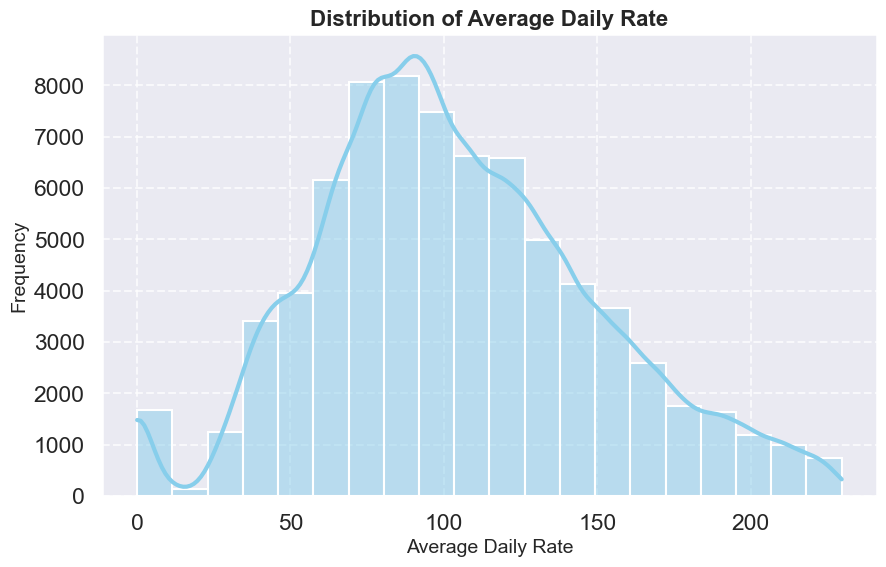

count    75208.000000
mean       103.952338
std         45.739756
min          0.000000
25%         73.000000
50%         99.000000
75%        132.600000
max        229.710000
Name: adr, dtype: float64

In [28]:
# Distribution of Average Daily Rate
sns.set_style("darkgrid")
sns.set_context("talk")  

plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(data=df, x='adr', kde=True, bins=20, color='skyblue', line_kws={'color': 'darkblue', 'lw': 3})
plt.title('Distribution of Average Daily Rate', fontsize=16, weight='bold')
plt.xlabel('Average Daily Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


df['adr'].describe()

#### Distribution Insights:

- **Average Daily Rate Overview:**
   - The average daily rate (ADR) of hotel stays ranges from a minimum of 0 to a maximum of 235.
   - The mean ADR is approximately $106.40.
   - The median ADR is close to the mean, at $100.07, suggesting a relatively symmetric distribution of ADR values around the center.

- **Variability in ADR:**
   - The standard deviation of 46.34 reveals a significant spread around the average ADR. 
   - This suggests that there is considerable variability in the prices of hotel rooms. 
   - Some guests are paying much more or less than the average rate, reflecting a range of pricing strategies or room types.

- **Percentile Distribution:**
   - The 25th percentile at 75.00 indicates that 25% of the ADR values are below 75.00.
   - The 75th percentile at 135.00 shows that 75% of the ADR values are below 135.00. 

- **Histogram and Kernel Density Estimate (KDE):**
   - The peak of the histogram and KDE curve suggests that most ADR values are concentrated around $100, with a gradual decline in frequency for higher and lower ADR values.

- **Observations from the Plot:**
   - The distribution shows a skew towards higher ADR values, with a notable frequency of ADRs around the $100 mark.
   - There is a long tail on the higher end, indicating that while most ADRs are clustered around the middle range, there are some high-value outliers.
   - We decided to keep those high-value outliers as they are probably from reserving rooms with more features and ammenities.


### **Question 1: What is the impact of repeat guest status on cancellation rates across different hotel types?**

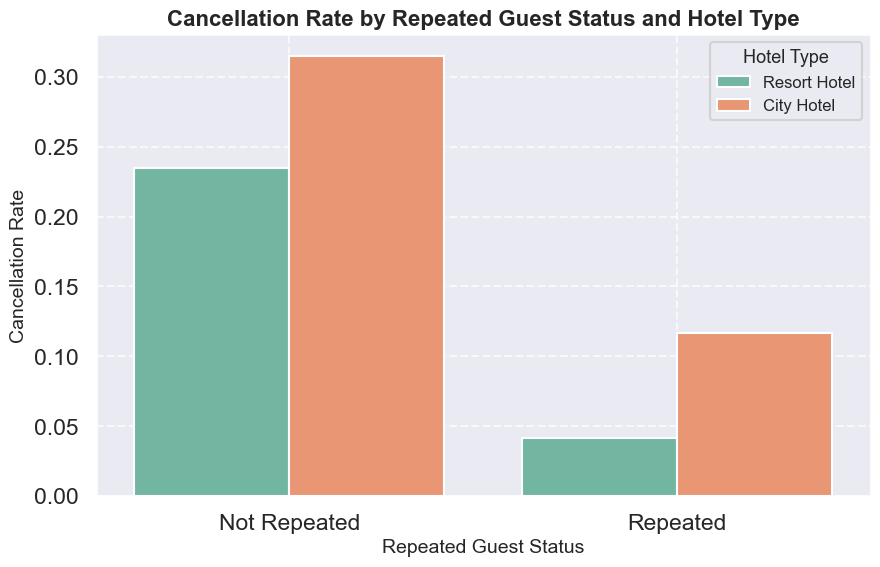

,is_repeated_guest,hotel,is_canceled
0,Not Repeated,Resort Hotel,0.234532
1,Not Repeated,City Hotel,0.315011
2,Repeated,Resort Hotel,0.041638
3,Repeated,City Hotel,0.116564


In [29]:
# Cancellation Rates by Repeat Status in Each Hotel Type
cancellation_rate = df.groupby(['is_repeated_guest', 'hotel'])['is_canceled'].mean().reset_index()

# Mapping boolean values to appropriate labels
cancellation_rate['is_repeated_guest'] = cancellation_rate['is_repeated_guest'].map({True: 'Repeated', False: 'Not Repeated'})
cancellation_rate['hotel'] = cancellation_rate['hotel'].map({True: 'City Hotel', False: 'Resort Hotel'})

sns.set_style("darkgrid")
sns.set_context("talk")
colors = ['#66c2a5', '#fc8d62']  

plt.figure(figsize=(10, 6))
sns.barplot(x='is_repeated_guest', y='is_canceled', hue='hotel', data=cancellation_rate, palette=colors)
plt.title('Cancellation Rate by Repeated Guest Status and Hotel Type', fontsize=16, weight='bold')
plt.xlabel('Repeated Guest Status', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)

plt.legend(title='Hotel Type', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

cancellation_rate

#### Non-Repeated Guests Cancellation Rate
- **City Hotel:** Non-repeated guests have a cancellation rate of 32.68%.
- **Resort Hotel:** Non-repeated guests have a cancellation rate of 25.97%.

- Non-repeated guests tend to cancel more often, especially in city hotels. This could indicate that first-time visitors to city hotels are more likely to have unpredictable plans or different expectations, leading to cancellations. Resort hotels seem to fare slightly better with non-repeated guests in terms of cancellations.

#### Repeated Guests Cancellation Rate
- **City Hotel:** Repeated guests have a cancellation rate of 15.33%.
- **Resort Hotel:** Repeated guests have a much lower cancellation rate of 5.33%.

- Guests who have stayed before tend to cancel less frequently, especially at resort hotels, where the cancellation rate is very low. This suggests that resort hotels are successful at retaining loyal guests who follow through with their reservations, possibly through rewards programs or exceptional service.

#### City Hotels Experience Higher Cancellation Rates
- Across both guest types (repeated and non-repeated), city hotels face higher cancellation rates.
- This trend might reflect the different nature of trips to city hotels, where plans are possibly more subject to change, compared to resort stays that are likely more planned and leisure-oriented.


### **Question 2: How do cancellation rates change over time, and are there noticeable trends or patterns in cancellations for each type of hotel?**

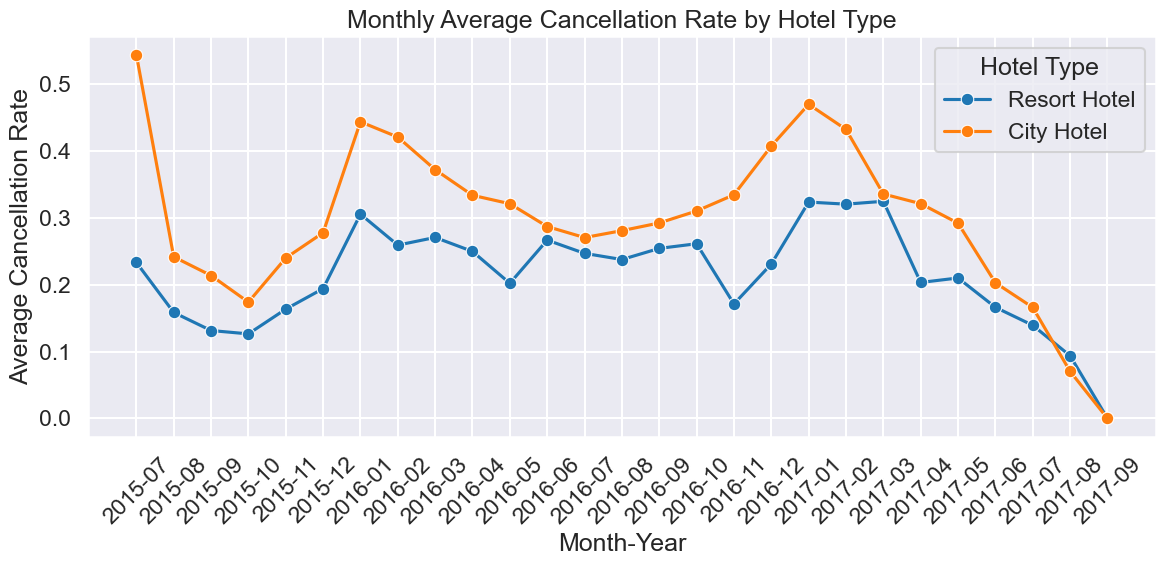

In [30]:
# Relationship of month_year and cancellations across the two types of hotels
monthly_cancellations = df.groupby(['month_year', 'hotel'])['is_canceled'].mean().reset_index()

# Converting 'month_year' to string format for plotting
monthly_cancellations['month_year'] = monthly_cancellations['month_year'].astype(str)
monthly_cancellations['hotel'] = monthly_cancellations['hotel'].map({True: 'City Hotel', False: 'Resort Hotel'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancellations, x='month_year', y='is_canceled', hue='hotel', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Average Cancellation Rate')
plt.title('Monthly Average Cancellation Rate by Hotel Type')
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


#### Analysis of Monthly Cancellation Rates 

##### Trends Over Time:
- The cancellation rates appear to fluctuate over time for both hotels. Cancellation rates tend to be higher during the first few months of the year and gradually decrease and start to pick back up again towards the end of the year. An explanation for this is that this time is during the holidays and usually around the time when severe storms impact travel. As a result, many are left to cancel their travel plans and reservations. More cancellations are noted for city hotels during these periods, which could indicate that guests are more likely to cancel reservations for city hotels than resort hotels. 

- An interesting trend to note is that cancellations begin to decrease for both hotels at the beginning of the year 2017. Several factors could be in a play for this: one is hotels might have updated their cancellation policies or required deposits to reduce cancellations. Another reason could be that 2017 had an unusual apttern in demand or seasonality (especially since it had the lowest rates during the summer months).

- The implications for this trend is that hotels should prepare for cancellations during the holiday seasons due to external or internal factors that prevent guests from going through with their reservation. The summer season when children are out of school tend to have fewer cancellations, which could imply that family groups are vacationing and thus less likely to cancel their reservations, which is apparent in the graph. Therefore, we can predict cancellations to occur more often during the last and first few months of the year. 